# Proyek Klasifikasi Gambar: Melanoma Skin Cancer
- **Nama:** Sony Alfauzan
- **Email:** sonyalfauzan46@gmail.com
- **ID Dicoding:** sonyalfauzan

  https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

## Import Semua Packages/Library yang Digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Loading

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset directory in your Google Drive
dataset_dir = '/content/drive/MyDrive/Proyek Klasifikasi Gambar/melanoma_cancer_dataset'

Mounted at /content/drive


Data augmentation

In [3]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [5]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyek Klasifikasi Gambar/melanoma_cancer_dataset', # Replace with the actual path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyek Klasifikasi Gambar/melanoma_cancer_dataset', # Replace with the actual path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8484 images belonging to 2 classes.
Found 2121 images belonging to 2 classes.


Build CNN model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Ubah jumlah neuron output menjadi 1 dan aktivasi menjadi 'sigmoid'


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile model

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train model

In [8]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


266/266 ━━━━━━━━━━━━━━━━━━━━ 6488s 24s/step - accuracy: 0.8732 - loss: 2.8861 - val_accuracy: 0.9057 - val_loss: 0.3272
Epoch 2/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 788s 3s/step - accuracy: 0.9069 - loss: 0.3505 - val_accuracy: 0.9057 - val_loss: 0.3274
Epoch 3/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 798s 3s/step - accuracy: 0.9028 - loss: 0.3360 - val_accuracy: 0.9057 - val_loss: 0.3189
Epoch 4/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 805s 3s/step - accuracy: 0.9056 - loss: 0.3278 - val_accuracy: 0.9057 - val_loss: 0.3700
Epoch 5/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 800s 3s/step - accuracy: 0.9049 - loss: 0.3284 - val_accuracy: 0.9057 - val_loss: 0.3583
Epoch 6/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 780s 3s/step - accuracy: 0.9068 - loss: 0.3170 - val_accuracy: 0.9057 - val_loss: 0.3270
Epoch 7/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 834s 3s/step - accuracy: 0.9073 - loss: 0.3168 - val_accuracy: 0.9057 - val_loss: 0.3180
Epoch 8/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 844s 3s/step - accuracy: 0.9032 - loss: 0.3276 - val_accuracy: 0.9

Plot accuracy and loss

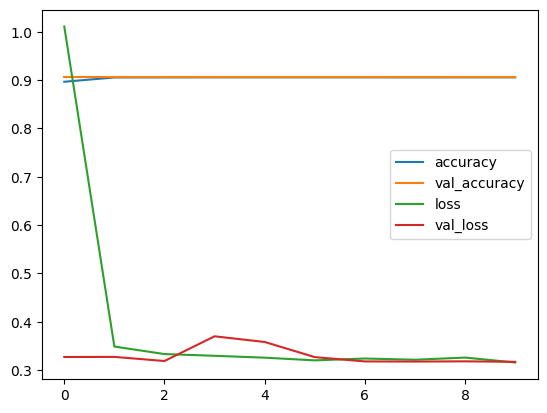

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


Save model in different formats

In [10]:
# Simpan model dalam format SavedModel
model.save('/content/drive/MyDrive/Proyek Klasifikasi Gambar/my_model.h5')

# Simpan model dalam format TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('/content/drive/MyDrive/Proyek Klasifikasi Gambar/my_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Simpan model dalam format TFJS
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Proyek Klasifikasi Gambar/tfjs_model')

Saved artifact at '/tmp/tmpggt5sn6p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135406337898480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135406337898832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135406337891264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135406082026032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135406082027264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135406082030784: TensorSpec(shape=(), dtype=tf.resource, name=None)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 90.1 M

failed to lookup keras version from the file,
    this is likely a weight only file


In [11]:
!pip freeze>requirements.txt